In [1]:
%load_ext autoreload
%autoreload 2

from spin_system import SpinSystem
from spin_system import interactions
from spin_system.plots import plot_spin_evolution

import numpy as np

import matplotlib.pyplot as plt


2025-09-27 12:32:38.366309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-27 12:32:38.397594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
lattice_dim = 2
lattice_length = 64
sweep_length = 10000
beta = 1
num_disturb = 1
initial_magnetization = 0.5

track_spins=True
track_energy=True
track_magnetization=True

In [3]:
interaction_matrix = interactions.periodic_nn(lattice_dim, lattice_length)
ising_spin_system = SpinSystem(
    lattice_dim=lattice_dim,
    lattice_length=lattice_length,
    interaction_matrix=interaction_matrix,
    model="ising",
    initial_magnetization=initial_magnetization
)

I0000 00:00:1758987162.288590   18010 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


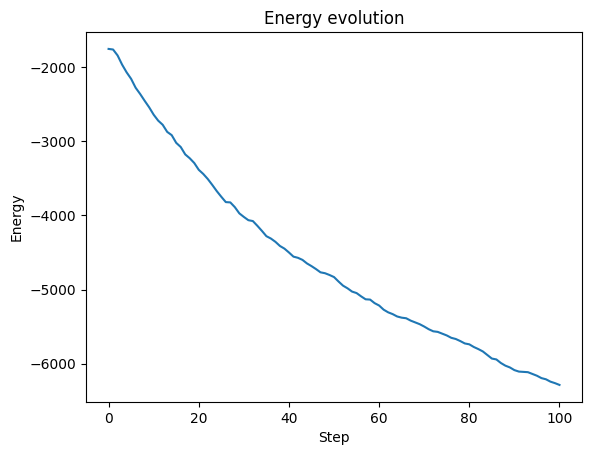

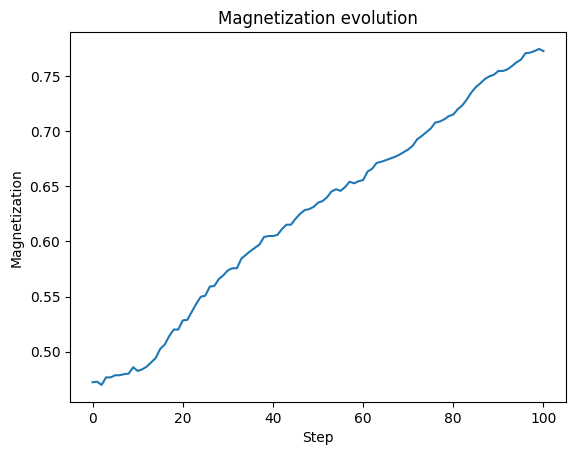

In [4]:
for counter in range(1):
    ising_results = ising_spin_system.metropolis_sweep(
        beta=beta,
        num_disturb=num_disturb,
        sweep_length=sweep_length,
        track_spins=track_spins,
        track_energy=track_energy,
        track_magnetization=track_magnetization
    )

    # --------------------------
    # Plot energy evolution
    # --------------------------
    if track_energy == True:
        energy_evolution = ising_results['energy_evolution'].numpy()
        plt.figure()
        plt.plot(energy_evolution)
        plt.xlabel("Step")
        plt.ylabel("Energy")
        plt.title("Energy evolution")
        plt.show()

    # --------------------------
    # Plot magnetization evolution
    # --------------------------
    if track_magnetization == True:
        magnetization_evolution = ising_results['magnetization_evolution'].numpy()
        plt.figure()
        plt.plot(magnetization_evolution)
        plt.xlabel("Step")
        plt.ylabel("Magnetization")
        plt.title("Magnetization evolution")
        plt.show()

    # --------------------------
    # Plot spins evolution
    # --------------------------
    if track_spins == True:
        spin_evolution = ising_results['spin_evolution'].numpy()

        plot_spin_evolution(spin_evolution, 1000).show()

In [5]:
interaction_matrix = interactions.decaying(lattice_dim, lattice_length)
spherical_spin_system = SpinSystem(
    lattice_dim=lattice_dim,
    lattice_length=lattice_length,
    interaction_matrix=interaction_matrix,
    model="spherical",
    spherical_constraint=True,
    initial_magnetization=initial_magnetization
)

In [6]:
spherical_results = spherical_spin_system.metropolis_sweep(
    beta=beta,
    num_disturb=num_disturb,
    theta_max=np.pi,
    sweep_length=sweep_length,
    track_spins=track_spins,
    track_energy=track_energy,
    track_magnetization=track_magnetization
)

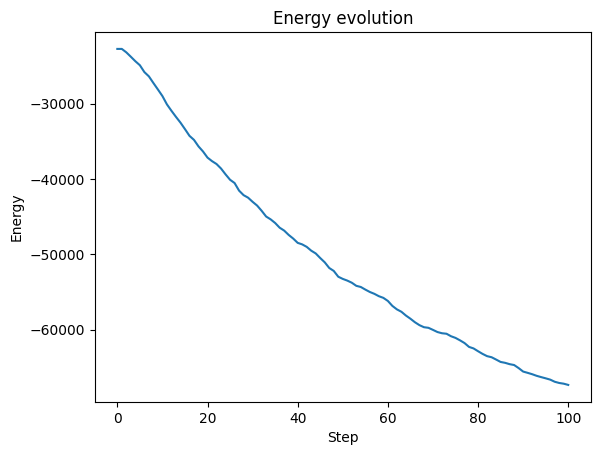

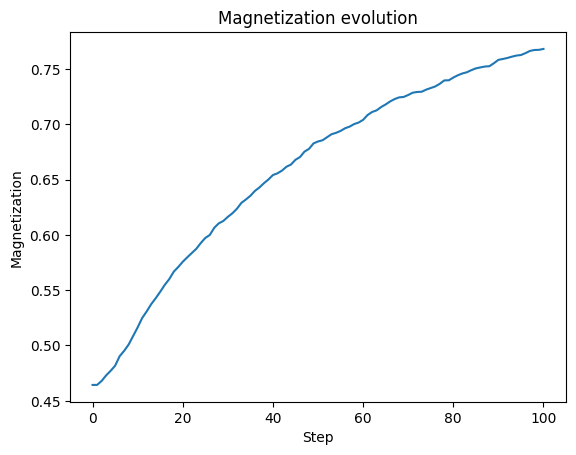

In [7]:
# --------------------------
# Plot energy evolution
# --------------------------
if track_energy == True:
    energy_evolution = spherical_results['energy_evolution'].numpy()
    plt.figure()
    plt.plot(energy_evolution)
    plt.xlabel("Step")
    plt.ylabel("Energy")
    plt.title("Energy evolution")
    plt.show()

# --------------------------
# Plot magnetization evolution
# --------------------------
if track_magnetization == True:
    magnetization_evolution = spherical_results['magnetization_evolution'].numpy()
    plt.figure()
    plt.plot(magnetization_evolution)
    plt.xlabel("Step")
    plt.ylabel("Magnetization")
    plt.title("Magnetization evolution")
    plt.show()

# --------------------------
# Plot spins evolution
# --------------------------
if track_spins == True:
    spin_evolution = spherical_results['spin_evolution'].numpy()

    plot_spin_evolution(spin_evolution, 1000).show()